In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('C:\\Users\\USER\\sanutobegin\\DA\\datas\\TV_Sales.csv')

In [3]:
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [5]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
#selecting the features
x=df[['TV']].values

In [8]:
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [9]:
#selecting the target column
y=df[['Sales']].values

In [10]:
y


array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [11]:
sc=StandardScaler()

In [12]:
x=sc.fit_transform(x)
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [21]:
#splitting into training and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
#model building
model=LinearRegression()

In [15]:
#fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [16]:
#coefficent
model.coef_

array([[92.9890112]])

In [17]:
#intercept
model.intercept_

array([192.43260955])

In [18]:
#training accuaracy
training_score=model.score(x_train,y_train)*100
training_score

99.89945329945171

In [22]:
#testing accuaracy
testing_score=model.score(x_test,y_test)*100
testing_score

99.89974160292293

In [23]:
#r2_score
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

99.89974160292293

In [24]:
#mean absolute error
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2.363243117039462

In [25]:
#mean squared error
mse=mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474161

In [26]:
y_pred=model.predict(x)
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

In [27]:
#creating a DataFrame with actual value in order to compare them
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156


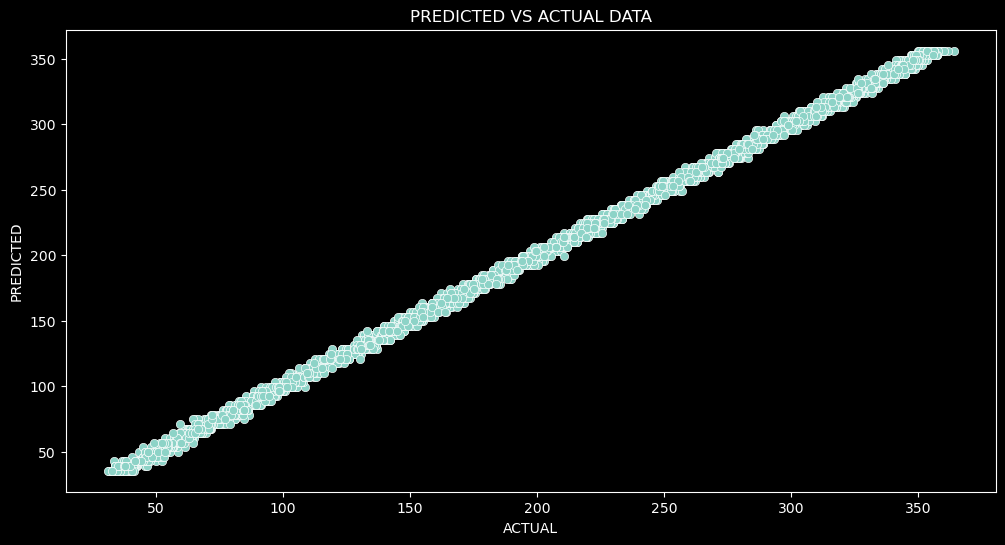

In [28]:
#Visualising the output
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

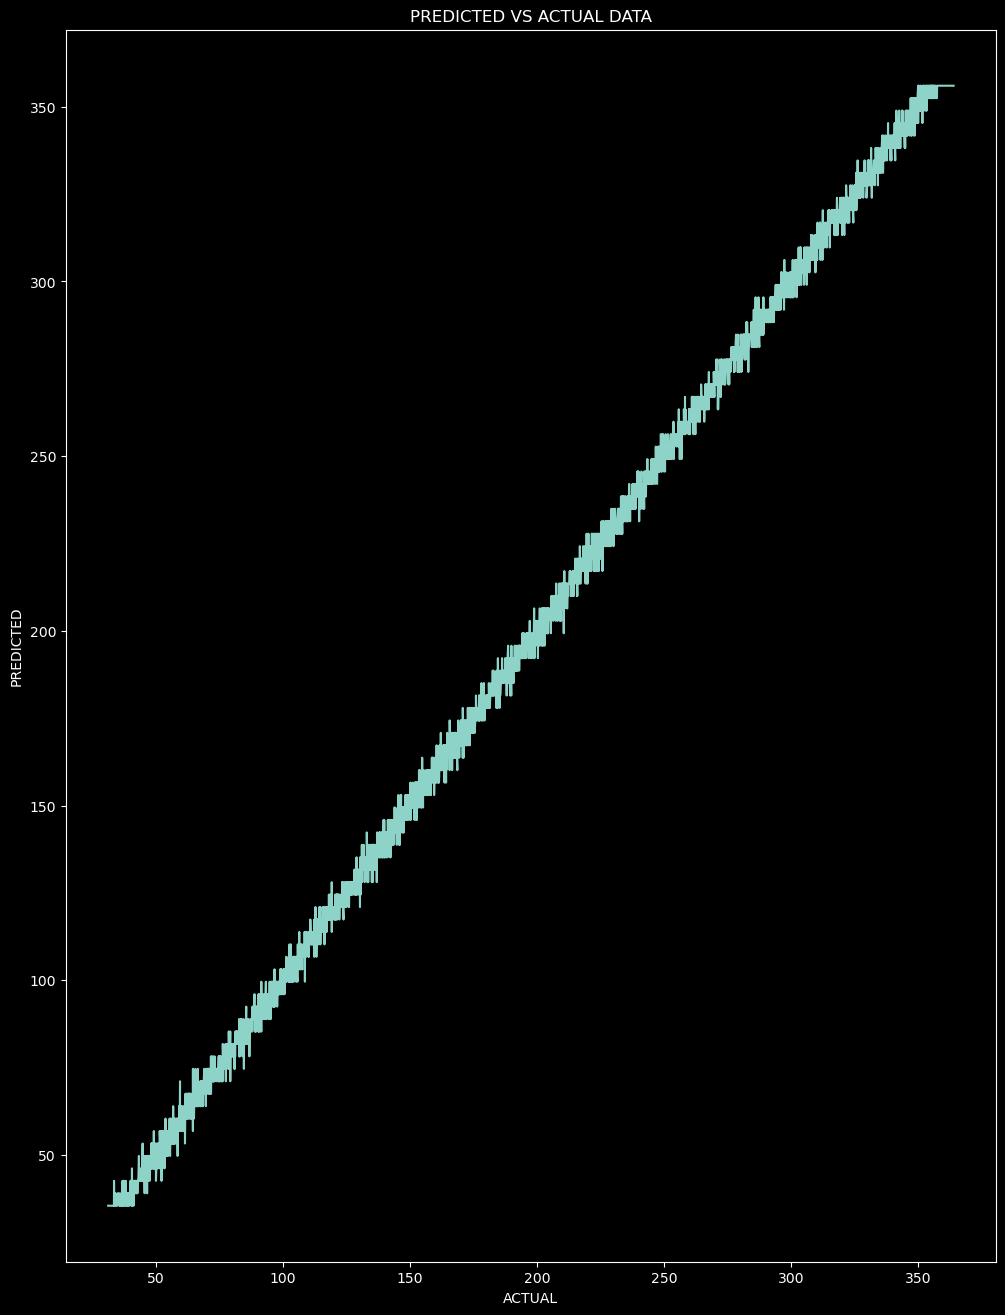

In [29]:
plt.figure(figsize=(12,16))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");